# 其中考试(考察1-9章)

# 142 可变类型和不可变类型分别列举3个

- 可变类型: mutable type, 常见的有: list, dict, set, deque等
- 不可变类型: 米mutable type, 常见的有: int, float, str, tuple, frozenset等
- 只有不可变类型才能作为字典等的键

# 143 容量为100的样本, 怎样使用list实现随机抽样10个

使用`random`模块中`randint`和`sample`方法, 使用列表生成式

In [4]:
from random import randint, sample
lst = [randint(0, 50) for _ in range(100)]
lst_sample=sample(lst, 10)
print(lst_sample)

[21, 6, 20, 50, 41, 16, 0, 7, 30, 25]


# 144 实现文件按行读取和操作数据分离功能
使用`yield`解藕按行读取和操作数据的两步操作

In [ ]:
def read_line(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            yield line

def process_line(line:str):
    pass

for line in read_line('.'):
    process_line(line)
    

# 145 找出列表中的所有重复元素

遍历列表, 如果出现次数大于1, 且不再返回列表`ret`中,则添加到`ret`中.

满足`x not in ret`, 则表明`x`不在列表中.

In [8]:
def find_duplicate(lst):
    ret = []
    for x in lst:
        if lst.count(x) > 1 and x not in ret:
            ret.append(x)
    return ret


调用`find_duplicate`

In [9]:
r = find_duplicate([1,2,3,4,3,2])
print(r)

[2, 3]


# 146 斐波那契数列

斐波那契数列第一、二哥元素都为1, 第三个元素等于前两个元素和, 依次类推. 下面是普通实现版本:

In [10]:
def fibonacci(n):
    if n <= 1:
        return [1]
    fib = [1, 1]
    while len(fib) < n:
        fib.append(fib[len(fib) -1] + fib[len(fib) - 2])
    return fib

调用`fibnacci`:

In [11]:
r = fibonacci(5)
print(r)

[1, 1, 2, 3, 5]


这不是高效的实现, 使用生成器更节省内存.

# 147 出境最多的元素
`max`函数是Python的内置函数, 所以使用它无需`import`
`max`有一个`key`参数, 指定如何进行值得比较.

下面案例, 求出现频次最多的元素, 当出境最多的元素有多个时, 按照下面方法, 默认只返回一个.

In [16]:
def mode(lst):
    if lst is None or len(lst)==0:
        return None
    return max(lst, key=lambda v: lst.count(v))

调用`mode`:

In [17]:
lst = [1, 3, 3, 2, 1, 1, 2]
r = mode(lst)
print(f'{lst}中出现次数最多的元素为:{r}')

[1, 3, 3, 2, 1, 1, 2]中出现次数最多的元素为:1


# 更长列表
带有一个`*`的参数为可变的位置参数, 意味着能传入人意多个位置参数.

`key`函数定义怎么比较大小;

`lambda`的参数v是`lists`中的一个元素

In [18]:
def max_len(*lists):
    return max(*lists, key=lambda v: len(v))

调用`max_len`, 传入三个列表, 正式`v`可能的三个取值:

In [19]:
r = max_len([1,2,3], [4,5,6,7],[8])
print(f'更长的列表是{r}')

更长的列表是[4, 5, 6, 7]


关于`lambda`函数, 在此做图形演示.

`max_len`函数被传入三个实参, 类型为`list`, 如下图所示, `lists`变量指向最下面的`tuple`实例:

![](https://images.gitbook.cn/2020-04-29-034621.png)

程序运行到下一帧, 会出现`lambda`函数, 它的父函数为f1, 也就是`max_len`函数.

可能不理解亮点, 这种用法中:
- 参数`v`取值到底是多少?
- `lambda`函数有返回值吗? 如果有, 返回值是多少

通过下面图形, 非常容易看出, `v`指向`tuple`实例的第一个元素, 指向的线和箭头能非常直观的反应出来.

![](https://images.gitbook.cn/2020-04-29-034622.png)

下面示意图中, 看到返回值为3, 也就是`len(v)`的返回值, 其中`v=[1,2,3]`.

![](https://images.gitbook.cn/2020-04-29-034623.png)

然后, `v`指向`tuple`中的下一个元素, 返回值为4.

![](https://images.gitbook.cn/2020-04-29-034624.png)

然后, `v`指向`tuple`的最后一个元素[8], 返回值为1.

![](https://images.gitbook.cn/2020-04-29-034625.png)

根据`key`确定的比较标准, `max`函数的返回值为红色字体指向的元素, 也就是返回[4, 5, 6, 7]

![](https://images.gitbook.cn/2020-04-29-034626.png)

完整动画演示:

![](https://images.gitbook.cn/2020-04-29-034626.gif)

# 149 重洗数据集
内置 `random` 中的 `shuffle` 函数，能实现对数据的重洗。

值得注意，`shuffle` 是对输入列表就地 (`in place`) 洗牌，节省存储空间。


In [20]:
from random import shuffle
lst = [randint(0, 50) for _ in range(100)]
shuffle(lst)
print(lst[:5])

[35, 2, 45, 0, 45]


# 150 生成满足均匀分布的坐标点

`random`模块，`uniform(a,b)` 生成 `[a,b)` 内的一个随机数。

如下，借助列表生成式，生成 100 个均匀分布的坐标点。

In [21]:
from random import uniform
x, y = [i for i in range(100)], [round(uniform(0, 10), 2) for _ in range(100)]
print(y)

[6.6, 4.23, 9.91, 1.83, 2.3, 1.92, 1.19, 4.55, 7.71, 6.64, 1.9, 8.17, 9.39, 8.82, 6.76, 0.19, 8.7, 0.5, 8.74, 3.6, 0.9, 6.09, 5.79, 9.1, 7.89, 6.04, 4.78, 5.0, 8.94, 9.24, 8.99, 4.95, 5.05, 1.53, 3.99, 2.09, 2.22, 4.94, 5.24, 4.54, 4.32, 0.91, 6.0, 2.75, 9.02, 7.14, 7.05, 0.29, 7.34, 1.38, 5.87, 3.26, 9.28, 0.44, 4.66, 6.25, 6.38, 3.74, 4.15, 2.46, 5.63, 9.98, 4.21, 5.75, 0.28, 5.78, 4.24, 1.27, 9.35, 9.27, 1.49, 0.22, 9.29, 1.28, 9.28, 2.68, 2.21, 8.48, 6.25, 6.77, 4.68, 1.79, 7.19, 9.04, 3.36, 9.31, 6.25, 6.38, 9.77, 7.48, 0.03, 5.34, 2.06, 5.54, 0.89, 6.23, 3.28, 8.83, 4.04, 7.61]


使用 `pyecharts` 绘图，版本1.6.2.

注意，运行以下代码至少保证版本要在 1.0 以上：

[5.25, 0.59, 8.01, 5.59, 2.87, 3.32, 7.5, 7.32, 8.77, 8.07, 0.99, 4.37, 6.21, 1.92, 6.29, 2.87, 9.56, 0.99, 7.47, 2.15, 6.37, 9.53, 9.26, 9.23, 8.34, 8.53, 8.84, 0.3, 3.01, 0.31, 6.42, 2.81, 7.81, 8.7, 5.63, 3.73, 0.53, 6.06, 0.75, 6.96, 9.93, 3.04, 8.44, 2.73, 3.74, 2.23, 8.8, 0.46, 8.73, 3.43, 3.97, 7.9, 1.61, 2.97, 5.83, 7.8, 2.44, 0.72, 1.5, 0.3, 6.28, 4.92, 7.03, 8.78, 1.12, 4.46, 3.03, 1.54, 8.49, 5.79, 3.98, 5.62, 3.07, 3.8, 7.05, 6.24, 8.51, 7.95, 3.87, 6.72, 9.6, 5.7, 7.85, 5.69, 6.9, 1.48, 8.11, 8.15, 5.9, 6.94, 3.77, 6.28, 6.31, 8.46, 2.56, 1.84, 4.28, 5.8, 8.06, 5.69]


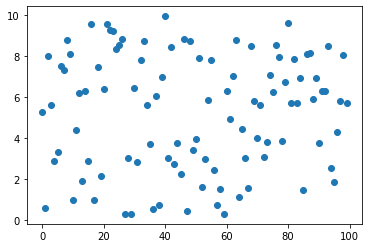

In [28]:
%matplotlib inline
from pyecharts.charts import Scatter
import matplotlib.pyplot as plt
import pyecharts.options as opts
from random import uniform

def draw_uniform_points():
    x, y = [i for i in range(100)], [round(uniform(0, 10), 2) for _ in range(100)]
    print(y)
    fig, ax = plt.subplots()
    ax.scatter(x, y)

draw_uniform_points()

变量`y`取值满足均匀分布

# 如何求两个集合的并集？

In [30]:
# 求并集
a = {1, 3, 5, 7}
b, c = {3, 4, 5, 6}, {6, 7, 8, 9}
d = a.union(b, c)
d


{1, 3, 4, 5, 6, 7, 8, 9}

![](https://images.gitbook.cn/2020-04-29-034629.png)

# 152 求两个集合的差集

In [31]:
# 求差集:
a = {1, 3, 5, 7}
b, c = {3, 4, 5, 6}, {6, 7, 8, 9}
d = a.difference(b, c)
d

{1}

![](https://images.gitbook.cn/2020-04-29-034630.png)

# 153 求两个集合的交集

In [33]:
# 求交集：

a = {1, 3, 5, 7}
b, c = {3, 4, 5, 6}, {6, 7, 8, 9}
d = a.intersection(b, c)
d

set()

![](https://images.gitbook.cn/2020-04-29-034631.png)

# 154 字典如何按键排序

In [34]:
def sort_by_key(d):
    return sorted(d.items(), key=lambda x: x[0])

sort_by_key({'a':3, 'b':1, 'c':2})

[('a', 3), ('b', 1), ('c', 2)]

`sorted`函数返回列表, 元素为`tuple`

![](https://images.gitbook.cn/2020-04-29-034633.png)

# 155 字段如何按值排序

与按照键排序原理相同, 按照值排序时, `key`函数定义为按值(`x[1]`)比较.

为照顾小白, 解释为什么是 `x[1]`，`d.items()`返回元素为 (`key, value`)的可迭代类型( `Iterable` )，`key` 函数的参数 `x`，便是元素 (`key, value`)，所以 `x[1]` 取到字典的值。

In [35]:
def sort_by_value(d):
    return sorted(d.items(), key=lambda x: x[1])

sort_by_value({'a':3, 'b':1, 'c':2})

[('b', 1), ('c', 2), ('a', 3)]

# 156 如何获取字典的最大键

通过`keys`拿到所有键, 获取最大键, 返回`(最大键, 值)`的元祖

In [36]:
def max_key(d):
    if len(d)==0:
        return []
    max_key = max(d.keys())
    return (max_key, d[max_key])

max_key({'a':3, 'c':3, 'b':2})

('c', 3)

# 157 最大字典值

最大值的字典，可能有多对：

In [38]:
def max_key(d):
    if len(d)==0:
        return []
    max_val = max(d.values())
    return [(key, max_val) for key in d if d[key] == max_val]

max_key({'a':3, 'c':3, 'b':2})

[('a', 3), ('c', 3)]

![](https://images.gitbook.cn/2020-04-29-034634.png)

# 158 集合最值

找出集合中的最大、最小值，并装到元组中返回：

In [39]:
def max_min(s):
    return (max(s), min(s))

max_min({1, 3, 5, 7})

(7, 1)

# 159 是否为单字符串判断

若组成字符串的所有字符仅出现一次，则被称为单字符串。

In [40]:
def single(string):
    return len(set(string))==len(string)

single('love_python') # False

False

In [41]:
single('python')

True

# 160 更长集合

key函数定义为按照元素长度比较大小，找到更长的集合：

In [42]:
def longer(s1, s2):
    return max(s1, s2, key=lambda x: len(x))

longer({1, 3, 5, 7}, {1, 5, 7})

{1, 3, 5, 7}

# 161 在两个列表中，找出重叠次数最多的元素

默认只返回一个

解决思路：

1. 求两个列表的交集
2. 遍历交集列表中的每一个元素，min(元素在列表1次数，元素在列表2次数) ，就是此元素的重叠次数
3. 求出最大的重叠次数

In [43]:
def max_overlap(lst1, lst2):
    overlap=set(lst1).intersection(lst2)
    ox = [(x, min(lst1.count(x), lst2.count(x))) for x in overlap]
    return max(ox, key=lambda x: x[1])

max_overlap([1,2,2,2,3,3],[2,2,3,2,2,3])

(2, 3)

# 162 topn 键

找出字典前 n 个最大值，对应的键。

导入 Python 内置模块 `heapq` 中的 `nlargest` 函数，获取字典中的前 n 个最大值。

key 函数定义按值比较大小

In [44]:
from heapq import nlargest

def topn_dict(d, n):
    return nlargest(n, d, key=lambda k: d[k])

topn_dict({'a':10, 'b':8, 'c':9, 'd':10}, 3)

['a', 'd', 'c']

# 163 一键对多值的字典

一键对多个值的实现方法1，按照常规思路，循序渐进：

In [45]:
d = {}
lst = [(1, 'apple'), (2,'orange'), (1, 'compute')]
for k, v in lst:
    if k not in d:
        d[k]=[]
    d[k].append(v)

d

{1: ['apple', 'compute'], 2: ['orange']}

以上方法，有一处 if 判断 ，确认 k 是不是已经在返回结果字典 d 中。

不是很优雅！

可以使用 `collections` 模块中的 `defaultdict`，它能创建属于某个类型的自带初始值的字典。

使用起来更加方便:

In [47]:
from collections import defaultdict
d = defaultdict(list)
for k, v in lst:
    d[k].append(v)

d

defaultdict(list, {1: ['apple', 'compute'], 2: ['orange']})

# 164 ChainMap 如何实现字典的逻辑合并

案例 3 中合并字典的方法：

In [48]:
dic1 = {'x':1, 'y':2}
dic2 = {'y':3, 'z':4}
merged = {**dic1, **dic2}

merged



{'x': 1, 'y': 3, 'z': 4}

修改 `merged['x']=10`，`dic1` 中的 x 值不变， `merged` 是重新生成的一个新字典。

但是，`collections` 模块中的 `ChainMap` 函数却不同。

它在内部创建了一个容纳这些字典的列表。

使用 `ChainMap` 合并字典，修改 `merged['x']=10` 后，dic1 中的 x 值改变。

如下所示：

In [50]:
from collections import ChainMap
dic1 = {'x':1, 'y':2}
dic2 = {'y':3, 'z':4}

merged=ChainMap(dic1, dic2)
merged

ChainMap({'x': 1, 'y': 2}, {'y': 3, 'z': 4})

In [51]:
merged['x'] = 10
dic1

{'x': 10, 'y': 2}

# 165 数据再运算

如下，实现对每个元素的乘方操作后，利用列表生成式返回一个新的列表。

In [52]:
a = range(0, 11)
b = [x**2 for x in a]
b

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

![](https://images.gitbook.cn/15353c50-560f-11ea-a714-09515afb96e2)

数值型的元素列表，转换为字符串类型的列表：

In [53]:
a = range(0, 10)
b = [str(i) for i in a]
b

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

![](https://images.gitbook.cn/2a115aa0-560f-11ea-908b-b5332759803b)

# 166 Python 生成一串随机数

生成 10 个 0 到 1 的随机浮点数，保留小数点后两位：

In [55]:
from random import random
a = [round(random(), 2) for _ in range(10)]
a

[0.8, 0.05, 0.77, 0.48, 0.69, 0.81, 0.49, 0.71, 0.9, 0.46]

![](https://images.gitbook.cn/3e982d00-560f-11ea-ac19-374315264b53)

生成10个0到10的满足均匀分布的浮点数, 保留小数点后两位:

In [56]:
from random import uniform
a = [round(uniform(0, 10), 2) for _ in range(10)]
a

[3.94, 7.19, 2.43, 7.8, 0.83, 7.16, 9.38, 3.98, 1.06, 1.67]

![](https://images.gitbook.cn/56f1d950-560f-11ea-ad74-0783a5f0ad5e)

# 167 if 和嵌套 for

对一个列表里面的数据筛选，只计算 `[0,11)` 中偶数的平方：

In [57]:
a = range(11)
c = [x**2 for x in a if x%2==0]
c

[0, 4, 16, 36, 64, 100]

![](https://images.gitbook.cn/831856d0-560f-11ea-908b-b5332759803b)

**列表生成式中嵌套for**

如下使用嵌套的列表, 一行代码生成99乘法表中的所有45个元素:


In [58]:
a = [i*j for i in range(10) for j in range(1, i+1)]
a

[1,
 2,
 4,
 3,
 6,
 9,
 4,
 8,
 12,
 16,
 5,
 10,
 15,
 20,
 25,
 6,
 12,
 18,
 24,
 30,
 36,
 7,
 14,
 21,
 28,
 35,
 42,
 49,
 8,
 16,
 24,
 32,
 40,
 48,
 56,
 64,
 9,
 18,
 27,
 36,
 45,
 54,
 63,
 72,
 81]

# 168 zip 和列表

In [59]:
a = range(5)
b = ['a', 'b', 'c', 'd', 'e']
c = [str(y) + str(x) for x, y in zip(a,b)]
c

['a0', 'b1', 'c2', 'd3', 'e4']

![](https://images.gitbook.cn/a2044b30-560f-11ea-91c3-41dcada8ff66)

# 169 打印键值对

In [60]:
a = {'a':1, 'b':2, 'c':3}
b = [k+ '=' + str(v) for k, v in a.items()]
b

['a=1', 'b=2', 'c=3']

![](https://images.gitbook.cn/bbf5fca0-560f-11ea-a714-09515afb96e2)

# 170 转为小写

In [61]:
a = ['Hello', 'World', '2018Python']
b = [w.lower() for w in a]
b

['hello', 'world', '2018python']

![](https://images.gitbook.cn/32607870-5610-11ea-bb07-d79dc32970fa)

以上写法可能会有问题, Python列表内元素类型可能不同, 如果列表a:

In [62]:
a = ['Hello', 'World', 2020, 'Python']
[w.lower() for w in a]

AttributeError: 'int' object has no attribute 'lower'

出现`int`对象没有`lower()`方法的问题

需要先转化元素为`str`

In [64]:
[str(w).lower() for w in a]

['hello', 'world', '2020', 'python']

更友好的做法, 使用`isinstance`判断元素是否为`str`类.
如果是, 再调用`lower`转化:

In [66]:
[w.lower() for w in a if isinstance(w, str)]

['hello', 'world', 'python']

# 171 保留唯一值

In [68]:
def filter_non_unique(lst):
    return [item for item in lst if lst.count(item) == 1]

filter_non_unique([1,2,2,3,4,5,4])

[1, 3, 5]

有了上面这些基础后, 再看看看几个难度大点的案例.

# 172 筛选分组

In [69]:
def bifurcate(lst, filter):
    return [
        [x for i, x in enumerate(lst) if filter[i] == True],
        [x for i, x in enumerate(lst) if filter[i] == False]
    ]

bifurcate(['beep', 'boop', 'foo', 'bar'], [True, True, False, True])

[['beep', 'boop', 'bar'], ['foo']]

![](https://images.gitbook.cn/48c4bd60-5610-11ea-afc1-9b7d03147fc6)

# 173 函数分组

In [70]:
def bifurcate_by(lst, fn):
    return [
        [x for x in lst if fn(x)],
        [x for x in lst if not fn(x)]
    ]

bifurcate_by(['Python3', 'up', 'users', 'people'], lambda x: x[0] =='u')

[['up', 'users'], ['Python3', 'people']]

![](https://images.gitbook.cn/5f355e60-5610-11ea-b227-d5a95658c855)

# 174 差集

In [71]:
def difference(a, b):
    _a, _b = set(a), set(b)
    return [item for item in _a if item not in _b]
difference([1,1,2,3,3], [1,2,4])

[3]

![](https://images.gitbook.cn/12bb02a0-5611-11ea-908b-b5332759803b)

# 175 函数差集

列表 `a、b` 中元素经过 `fn` 映射后，返回在 `a` 不在 `b` 中的元素。

In [72]:
def difference_by(a, b, fn):
    _b = set(map(fn, b))
    return [item for item in a if fn(item) not in _b]

列表元素为单个元素:

In [73]:
from math import floor
difference_by([2.1, 1.2], [2.3, 3.4], floor)

[1.2]

![](https://images.gitbook.cn/32e3bcc0-5611-11ea-9dfa-cf3c87b75c44)

列表元素为字典：

In [74]:
difference_by([{'x':2}, {'x':1}], [{'x':1}], lambda v: v['x'])

[{'x': 2}]

![](https://images.gitbook.cn/501f9020-5611-11ea-ac19-374315264b53)

# 176 打乱一个列表

使用 `random` 模块， `shuffle` 函数打乱原来列表，值得注意是 `in-place` 打乱。

In [ ]:
import random
a = range(10)
random.shuffle(a)
a

# 177 字典按 value 排序并返回新字典?

原字典：

`d= {'a':12,'b':50,'c':1,'d':20}`

使用 Python 内置函数 `sorted` 排序

In [83]:
d= {'a':12,'b':50,'c':1,'d':20}
d = dict(sorted(d.items(), key=lambda item: item[1]))
d

{'c': 1, 'a': 12, 'd': 20, 'b': 50}

# 178 如何删除 list 里重复元素，并保证元素顺序不变

给定列表：`a = [3,2,2,2,1,3]`

如果只是删除重复元素，直接使用内置 set 函数，去重，但是不能保证原来元素顺序。

不要这么做，列表删除某个元素后，后面的元素整体会向前移动。

In [86]:
a = [3,2,2,2,1,3]
def del_duplicated(a):
    ac = a.copy()
    b = []
    for index, i in enumerate(ac):
        if i in b:
            del ac[index]
        else:
            b.append(i)
    return ac

r = del_duplicated(a)
r

[3, 2, 2, 1]

正确做法:

In [88]:
def del_duplicated(a):
    b = []
    for i in a:
        if i not in b:
            b.append(i)
    return b

r = del_duplicated(a)
r

[3, 2, 1]

# 179 怎么找出两个列表的相同元素和不同元素？

给定列表 `a = [3,2,2,2,1,3]`，列表 `b = [1,4,3,4,5]`

使用集合，找出相同元素：

In [89]:
a = [3,2,2,2,1,3]
b = [1,4,3,4,5]

def ana(a, b):
    aset, bset=set(a), set(b)
    same=aset.intersection(bset)
    differ=aset.difference(bset).union(bset.difference(aset))
    return same, differ

ana(a, b)

({1, 3}, {2, 4, 5})

# 180 统计一个文本中单词频次最高的 10 个单词

使用 `yield` 解耦数据读取 `python_read` 和数据处理 `process`

`python_read`：逐行读入

`process`： 正则替换掉空字符，并使用空格，分隔字符串，保存到 `defaultdict` 对象中。

In [90]:
from collections import Counter, defaultdict
import re
def python_read(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            yield line

d = defaultdict(int)

def process(line):
    for word in re.sub('\W+', ' ', line).split():
        d[word] += 1


使用两个函数

最后, 使用`Counter`类统计出频次最高的10个单词:

In [92]:
for line in python_read('write_file.py'):
    process(line)

most10 = Counter(d).most_common(10)

print(most10)

[('line', 4), ('import', 2), ('defaultdict', 2), ('re', 2), ('def', 2), ('filename', 2), ('f', 2), ('for', 2), ('in', 2), ('d', 2)]


# 181 反转一个整数，例如-12345 --> -54321

如果 x 位于 （-10，10）间，直接返回；

然后，将 x 转换为字符串对象 sx ；

如果 x 是负数，截取 sx[1:]，并反转字符串；

如果 x 是正数，直接反转字符串 ；

最后使用内置函数 int() 转化为整数

In [93]:
def reverse_int(x: int):
    if -10 < x < 10:
        return x
    sx = str(x)

    def reverse_str(sx):
        return sx[::-1]

    if sx[0] == '-':
        sx = reverse_str(sx[1:])
        x = int(sx)
        return -x

    sx = reverse_str(sx)
    return int(sx)

    

# 182 以下代码输出结果

此题需要注意, 内嵌函数`foo`使用两个变量`i`和`x`, 其中`x`为其形参, `i`为`enclosing`域内定义的变量.

`rtn`添加三个函数`foo`, 但是并未发生调用.

In [94]:
def f():
    i = 0
    def foo(x):
        return i*x
    rtn = []
    while i < 3:
        rtn.append(foo)
        i += 1
    return rtn
# 调用函数f
for fs in f():
    print(fs(10))
    

30
30
30


直到 执行 `fs(10)` 时，内嵌函数 `foo` 才被调用，但是此时的 `enclosing` 变量 `i` 取值为 `3`

In [95]:
for fs in f():
    print(fs(10))

30
30
30


# 183 如下函数`foo`的调用哪些是正确的

In [96]:
def foo(filename, a=0, b=1, c=2):
    print('filename: %s \n c: %d'%(filename,c))

已知 `filename` 为 '`.`'，`c` 为 `10`，正确为 `foo` 函数传参的方法，以下哪些是对的，哪些是错误的？

```python
- A foo('.', 10)
- B foo('.', 0, 1, 10)
- C foo('.', 0, 1, c=10)
- D foo('.', a=0, 1, 10)
- E foo(filename='.', c=10)
- F foo('.', c=10)
```

## 分析:
- A 错误, a被赋值为10
- B 正确, c是位置参数
- C 正确, c是关键字参数
- D 错误, 未知参数不能位于关键字参数后面
- E 正确, filename和c都是关键字参数
- F 正确, filename位置参数, c是关键字参数



验证测试：

In [98]:
foo('.', 10)

filename: . 
 c: 2


In [99]:
foo('.',0,1,10)

filename: . 
 c: 10


In [100]:
foo('.',0,1,c=10)

filename: . 
 c: 10


In [101]:
foo('.', a=0, 1, 10)

SyntaxError: positional argument follows keyword argument (2022290669.py, line 1)

In [102]:
foo(filename='.', c=10)

filename: . 
 c: 10


In [103]:
foo('.', c=100)

filename: . 
 c: 100


# 184 单机 4 G 内存，处理 10 G文件的方法？

假定可以单独处理一行数据，行间数据相关性为零。

方法一：

仅使用 Python 内置模板，逐行读取到内存。

使用 yield，好处是解耦读取操作和处理操作：

In [104]:
def python_read(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            yield line

以上每次读取一行, 逐行迭代, 逐行处理数据

In [ ]:
if __name__ == '__main__':
    g = python_read('./data/movies.dat')
    for c in g:
        print(c)

方法二：

方法一有缺点，逐行读入，频繁的 IO 操作拖累处理效率。是否有一次 IO ，读取多行的方法？

pandas 包 read_csv 函数，参数有 38 个之多，功能非常强大。

关于单机处理大文件，read_csv 的 chunksize 参数能做到，设置为 5， 意味着一次读取 5 行。

In [107]:
def pandas_read(filename, sep=',', chunksize=5):
    reader=pd.read_csv(filename, sep=sep, chunksize=chunksize)
    while True:
        try:
            yield reader.get_chunk()
        except StopIteration:
            print('-----Done------')
            break

使用如同方法一:

In [ ]:
import pandas as pd
if __name__ == '__main__':
    g = pandas_read('./data/movies.dat', sep='::')
    for c in g:
        print(c)

以上就是单机处理大文件的两个方法，推荐使用方法二，更加灵活。

# 185 使用 filter() 求出列表中大于 10 的元素

`filter`函数使用`lambda`函数, 找出满足大于10的元素

In [110]:
a = [15, 2, 7, 20, 400, 10, 9, -15, 107]
al = list(filter(lambda x: x>10, a))
al

[15, 20, 400, 107]

# 186 说说下面map函数的输出结果
`map`函数当含有多个列表时, 返回长度最短列表的长度;
`lambda`函数的形参个数等于后面列表的个数.

In [111]:
m = map(lambda x, y: min(x,y), [5,1,3,4], [3,4,3,2,1])
print(list(m))

[3, 1, 3, 2]


# 187 说说 reduce 函数的输出结果

`reduce` 实现对列表的归约化简，规则如下

`f(x,y) = x*y + 1`

因此，下面归约的过程为：

```
f(1,2) = 3

f(3,3) = 3*3 + 1 = 10

f(10,4) = 10*4 + 1 = 41

f(41,5) = 41*5 + 1 = 206
```

In [112]:
from functools import reduce
reduce(lambda x, y: x*y+1, [1,2,3,4,5])

206

# 188 x = (i for i in range(5))，x 是什么类型

x 是生成器类型

与 for 等迭代，输出迭代结果：

In [113]:
x = (i for i in range(5))
for i in x:
    print(i)

0
1
2
3
4


# 189 写一个学生类`Student`

添加一个属性`id`, 并实现若`id`相等, 则认为是同一位同学的功能.

重写`__eq__`方法, 若`id`相等, 返回`True`

In [114]:
class Student:
    def __init__(self, id, name):
        self.id = id
        self.name = name
    def __eq__(self, student):
        return self.id == student.id

判断两个Student对象, `==`的取值:

In [115]:
s1 = Student(10, 'xiaoming')
s2 = Student(20, 'xiaohong')
s3 = Student(10, 'xiaoming2')

s1==s2

False

In [116]:
s1 == s3

True